<a href="https://colab.research.google.com/github/Camuslu/4clojure-answer/blob/master/multi_armed_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [46]:
class Arm:
  def __init__(self, p):
    self.p = p

  def get_p(self):
    return self.p
  
  def toss(self):
    return np.random.binomial(1, self.p, 1)[0]

In [9]:
a1 = Arm(0.8)

In [82]:
number_of_arms =5

5 bandits, with prob 0.4, 0.45, 0.5, 0.55, 0.6

In [47]:
Arms = [Arm(0.4 + p*0.05) for p in range(5)]

In [107]:
## init estimate reward to be high, so that each arm shall get some chance to be exploited in the initial phase
estimate_reward = np.array([1.0] * 5)
chosen_times = np.array([1] * 5)
avg_regret_by_turn = []
expected_return_best_arm = 0.6
arm_expected_return = np.array([arm.get_p() for arm in Arms])

## Greedy **Algorithm**

In [108]:
def choose_argmax_arm(estimate_reward):
    return np.random.choice(np.flatnonzero(estimate_reward == estimate_reward.max()))

In [109]:
for turn in range(500):
    arm_index = choose_argmax_arm(estimate_reward)
    arm = Arms[arm_index]
    reward = arm.toss()
    new_estimate_for_chosen_arm = (chosen_times[arm_index] * estimate_reward[arm_index] + reward)/(chosen_times[arm_index] + 1)
    estimate_reward[arm_index] = new_estimate_for_chosen_arm
    chosen_times[arm_index] += 1
    total_reward = np.dot(chosen_times-1, estimate_reward)
    avg_regret_by_turn.append(expected_return_best_arm - np.dot(chosen_times - 1, arm_expected_return)/np.sum(chosen_times - 1))

In [110]:
chosen_times

array([  2,   8,  37, 450,   8])

In [40]:
estimate_reward

array([0.5      , 0.5      , 0.5      , 0.6      , 0.6119403])

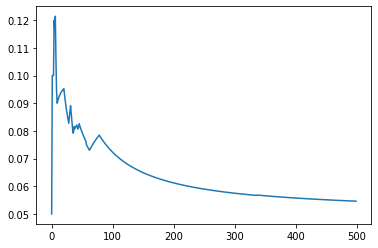

In [111]:
import matplotlib.pyplot as plt
plt.plot(range(500), avg_regret_by_turn)


## Epsilon Greedy

In [103]:
## init estimate reward to be high, so that each arm shall get some chance to be exploited in the initial phase
estimate_reward = np.array([1.0] * 5)
chosen_times = np.array([1] * 5)
expected_return_best_arm = 0.6
arm_expected_return = np.array([arm.get_p() for arm in Arms])
avg_regret_by_turn_epsilon = []

In [104]:
epsilon = 0.1
def choose_arm(estimate_reward):
  if np.random.uniform(0, 1) < epsilon:
      return np.random.choice(number_of_arms)
  else:
      return choose_argmax_arm(estimate_reward)

In [105]:
for turn in range(500):
    arm_index = choose_arm(estimate_reward)
    arm = Arms[arm_index]
    reward = arm.toss()
    new_estimate_for_chosen_arm = (chosen_times[arm_index] * estimate_reward[arm_index] + reward)/(chosen_times[arm_index] + 1)
    estimate_reward[arm_index] = new_estimate_for_chosen_arm
    chosen_times[arm_index] += 1
    total_reward = np.dot(chosen_times-1, estimate_reward)
    avg_regret_by_turn_epsilon.append(expected_return_best_arm - np.dot(chosen_times - 1, arm_expected_return)/np.sum(chosen_times - 1))

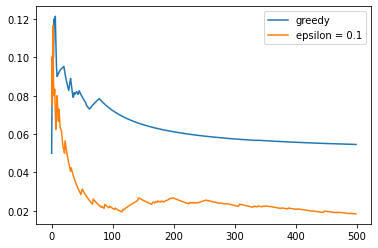

In [113]:
import matplotlib.pyplot as plt
plt.plot(range(500), avg_regret_by_turn, label = "greedy")
plt.plot(range(500), avg_regret_by_turn_epsilon, label = "epsilon = 0.1")
plt.legend()
plt.show()
